## Importing necessary packages

In [18]:
import matplotlib.pyplot as plt  # Importing Matplotlib for creating visualizations and plots.
import random  # Importing the 'random' module for generating random numbers and making random selections.
import numpy as np  # Importing NumPy, a library for numerical operations, used here for handling and manipulating image data arrays.


## Loading the Datasets

In [19]:
import numpy as np

# Load the datasets
train_images = np.load('CubeSat_ImageClassify/data/train_images.npy')
train_labels = np.load('CubeSat_ImageClassify/data/train_labels.npy')
val_images = np.load('CubeSat_ImageClassify/data/val_images.npy')
val_labels = np.load('CubeSat_ImageClassify/data/val_labels.npy')
test_images = np.load('CubeSat_ImageClassify/data/test_images.npy')
test_labels = np.load('CubeSat_ImageClassify/data/test_labels.npy')

# Print basic information about each dataset
print(f"Training images: {train_images.shape}, Training labels: {train_labels.shape}")
print(f"Validation images: {val_images.shape}, Validation labels: {val_labels.shape}")
print(f"Testing images: {test_images.shape}, Testing labels: {test_labels.shape}")


Training images: (9711, 512, 512, 3), Training labels: (9711,)
Validation images: (3237, 512, 512, 3), Validation labels: (3237,)
Testing images: (3237, 512, 512, 3), Testing labels: (3237,)


## Dataset Shape Explanation

The dataset consists of images and their corresponding labels, split into training, validation, and testing sets.

### Training Set:
- **Images Shape:** `(9711, 512, 512, 3)`
  - There are **9711** training images.
  - Each image has a resolution of **512 × 512** pixels.
  - The `3` represents the number of color channels (RGB).
- **Labels Shape:** `(9711,)`
  - There are **9711** labels, one for each image.

### Validation Set:
- **Images Shape:** `(3237, 512, 512, 3)`
  - There are **3237** validation images.
  - Each image has a resolution of **512 × 512** pixels.
  - The `3` represents the RGB color channels.
- **Labels Shape:** `(3237,)`
  - There are **3237** labels, one for each image.

### Testing Set:
- **Images Shape:** `(3237, 512, 512, 3)`
  - There are **3237** test images.
  - Each image has a resolution of **512 × 512** pixels.
  - The `3` represents the RGB color channels.
- **Labels Shape:** `(3237,)`
  - There are **3237** labels, one for each image.

### Summary:
- The dataset is split into **training (9711 images), validation (3237 images), and testing (3237 images)**.
- Each image is a **512 × 512 RGB image**.
- Labels are **1D arrays** corresponding to the images.


## Data Preprocessing

In [22]:
def preprocessing_fn_ML(X): 
    from skimage.color import rgb2gray
    from skimage.transform import resize
    
    # Convert to grayscale
   X_pre = np.array([rgb2gray(image) for image in X_pre])

    # Keep RGB and normalize
    X_pre = X.astype('float32') / 255.0

    
    # Resize images to 64x64 pixels
    X_pre = np.array([resize(image, (64, 64), anti_aliasing=True) for image in X_pre])
    
    # Flatten the images
    num_samples = X_pre.shape[0]
    X_pre = X_pre.reshape(num_samples, -1)
    
    return X_pre

## Image Preprocessing Function Explanation

The function `preprocessing_fn_ML(X)` applies a series of preprocessing steps to an input dataset of images.

### Steps:
1. **Convert to Grayscale**  
   - Uses `rgb2gray` from `skimage.color` to convert RGB images to grayscale.
   - However, there is an issue in the function: `X_pre` is referenced before assignment. This should be fixed by changing `X_pre` to `X` in the first list comprehension.

2. **Normalize Pixel Values**  
   - The images are converted to `float32` and divided by `255.0` to scale pixel values to the range `[0, 1]`.

3. **Resize Images to 64×64 Pixels**  
   - Uses `resize` from `skimage.transform` with `anti_aliasing=True` to prevent aliasing artifacts.

4. **Flatten the Images**  
   - Reshapes each image from a 2D (grayscale) or 3D (RGB) array into a 1D feature vector.
   - Ensures compatibility with machine learning models that expect vectorized inputs.

### Issues in the Function:
- **Incorrect Variable Name (`X_pre`)**  
  - In the grayscale conversion step, `X_pre` should be `X`, since `X_pre` is not yet defined.
- **Mixing Grayscale and RGB Processing**  
  - The function first converts images to grayscale but later retains RGB processing.
  - If grayscale is desired, normalization should be applied *after* grayscale conversion.


In [23]:
train_images_pre = preprocessing_fn_ML(train_images)
val_images_pre = preprocessing_fn_ML(val_images)


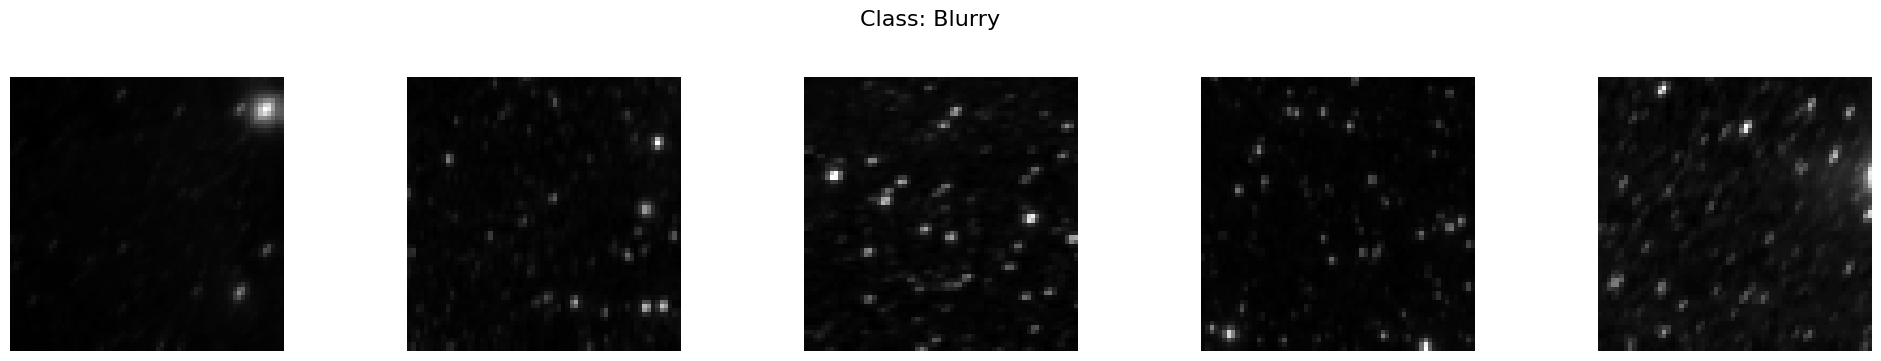

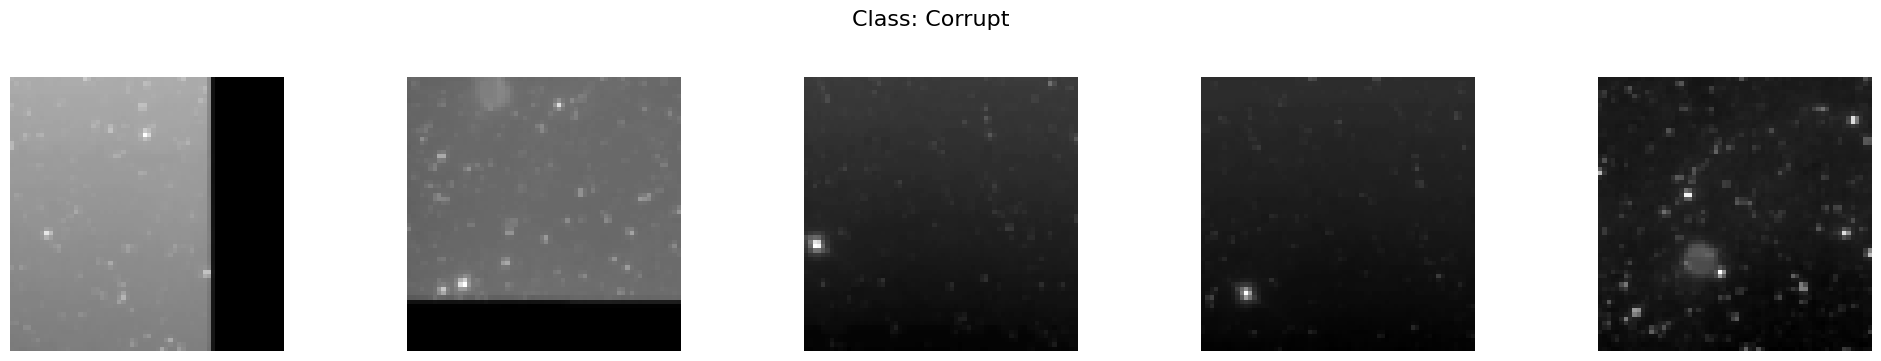

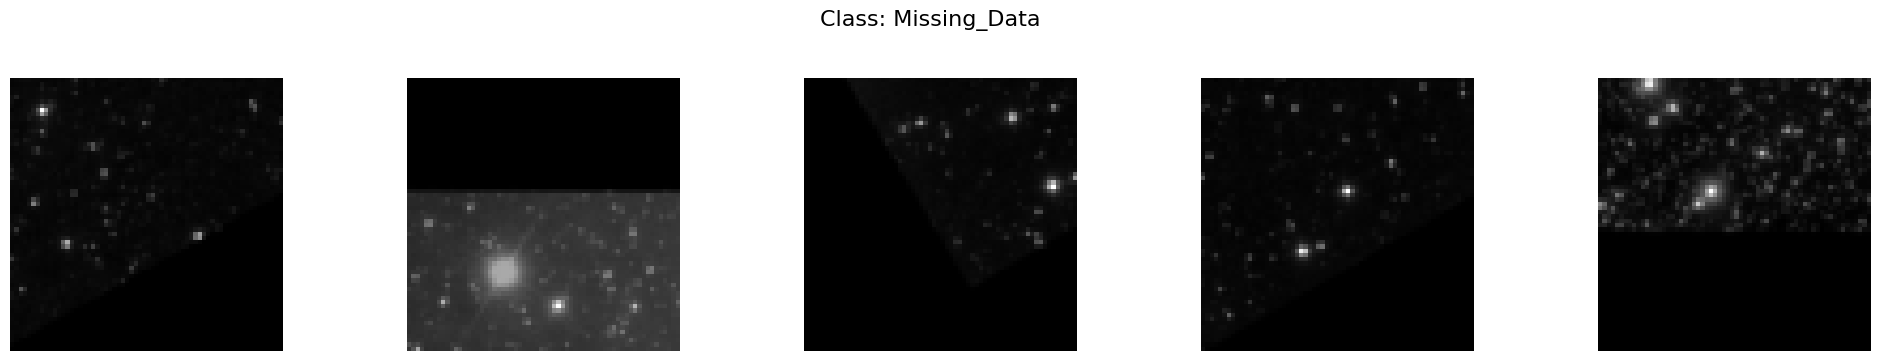

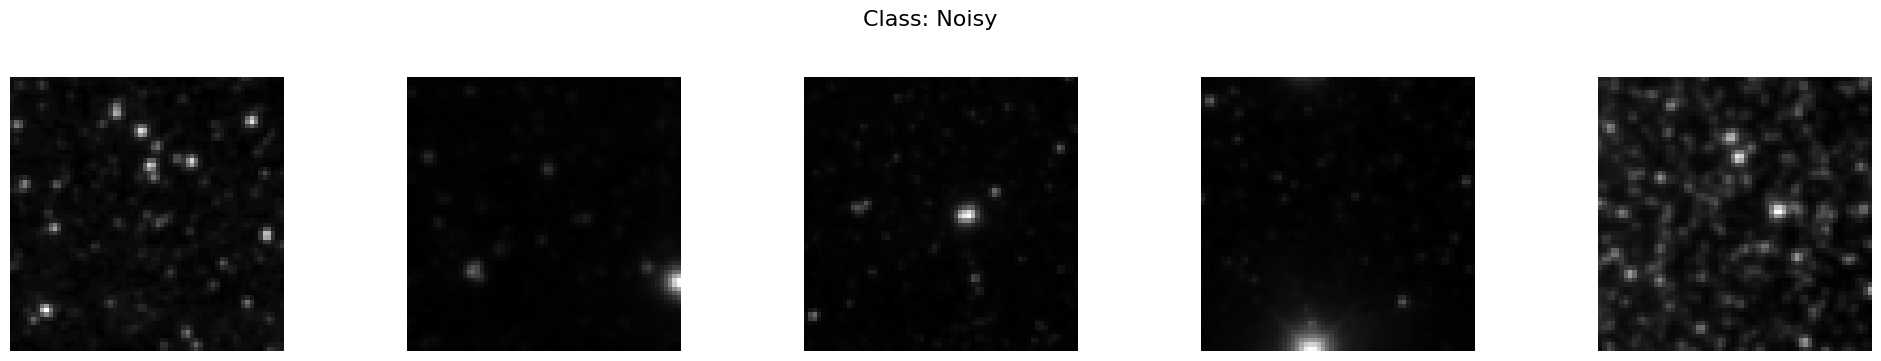

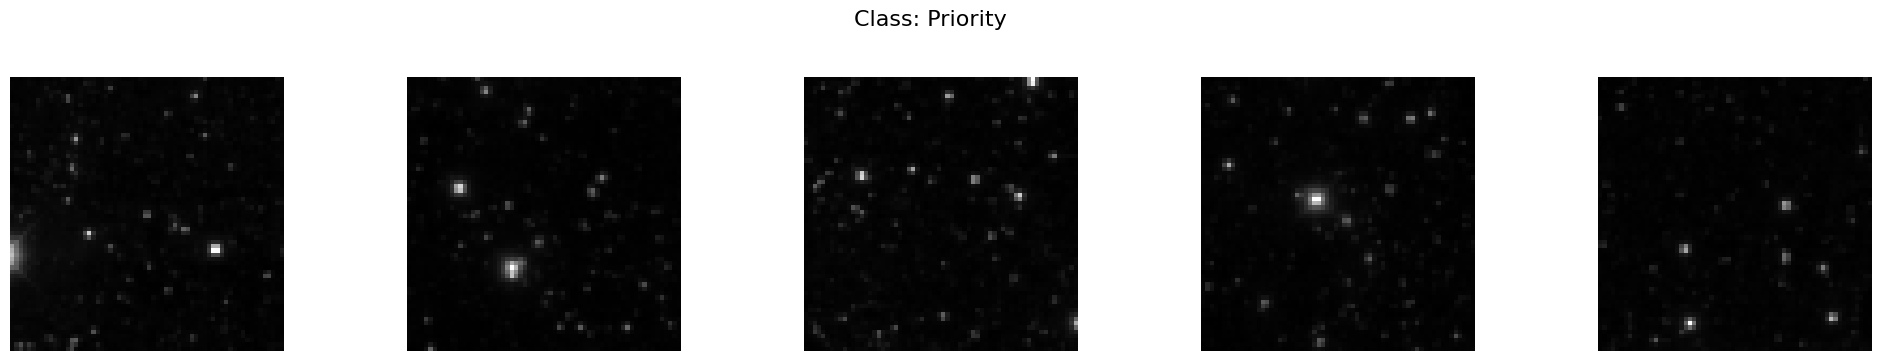

In [24]:
import matplotlib.pyplot as plt

# Define the class names
class_names = ["Blurry", "Corrupt", "Missing_Data", "Noisy", "Priority"]

# Get the unique labels in the training set
unique_labels = np.unique(train_labels)

# Display the first 5 images for each class after preprocessing
for label in unique_labels:
    # Find the indices of images belonging to the current class
    class_indices = np.where(train_labels == label)[0]
    
    # Select the first 5 images of this class
    num_images_to_display = min(5, len(class_indices))
    selected_indices = class_indices[:num_images_to_display]
    selected_images = train_images_pre[selected_indices]  # Already preprocessed images

    # Plot the selected images
    fig, axes = plt.subplots(1, num_images_to_display, figsize=(20, 4))
    fig.suptitle(f'Class: {class_names[label]}', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    
    for i, ax in enumerate(axes):
        ax.imshow(selected_images[i].reshape(64, 64), cmap='gray')  # Reshape and use grayscale colormap
        ax.axis('off')
    
    plt.show()
    print()

After processing this in the output of the images and clearly we can see that it's difficulty to classifiy the images with our eyes, now let's develop a machine learning model to be able to classify the images.

In [25]:
# from sklearn.linear_model import SGDClassifier
# import pickle

# # Create the stochastic gradient descent model

# sgd_model = SGDClassifier( loss='log_loss', max_iter=10000, n_jobs=4, random_state=42)

# # Fit the model on the training data
# sgd_model.fit(train_images_pre, train_labels)

# # Save the model to a file
# with open('sgd_model.pkl', 'wb') as file:
#     pickle.dump(sgd_model, file)

## Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
import pickle

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# Fit the model on the training data
rf_model.fit(train_images_pre, train_labels)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [33]:
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)
    
val_predictions = rf_model.predict(val_images_pre)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix


# Detailed classification report
print("\nClassification Report:")
print(classification_report(val_labels, val_predictions))



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       727
           1       1.00      1.00      1.00       222
           2       0.96      0.99      0.98       421
           3       0.65      0.37      0.47       721
           4       0.69      0.96      0.80      1146

    accuracy                           0.77      3237
   macro avg       0.83      0.80      0.80      3237
weighted avg       0.78      0.77      0.76      3237



## Classification Report Overview

This classification report provides key performance metrics for a multi-class model.

### Metrics:
- **Precision**: The proportion of correctly predicted positive observations to total predicted positives.
- **Recall**: The proportion of correctly predicted positive observations to actual positives.
- **F1-Score**: The harmonic mean of precision and recall.
- **Support**: The number of actual occurrences for each class.

### Breakdown by Class:
- Class `0`: Moderate performance (`0.86` precision, `0.69` recall).
- Class `1`: Perfect classification (`1.00` precision, `1.00` recall).
- Class `2`: Very high performance (`0.96` precision, `0.99` recall).
- Class `3`: Poor recall (`0.37`), leading to a low F1-score.
- Class `4`: High recall (`0.96`), moderate precision (`0.69`).

### Overall Performance:
- **Accuracy**: `77%` of all predictions are correct.
- **Macro Avg**: `0.83` precision, `0.80` recall, `0.80` F1-score (unweighted average).
- **Weighted Avg**: `0.78` precision, `0.77` recall, `0.76` F1-score (weighted by support count).

This report suggests that some classes perform well (e.g., `1` and `2`), while others (e.g., `3`) need improvement.


In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 77.36%


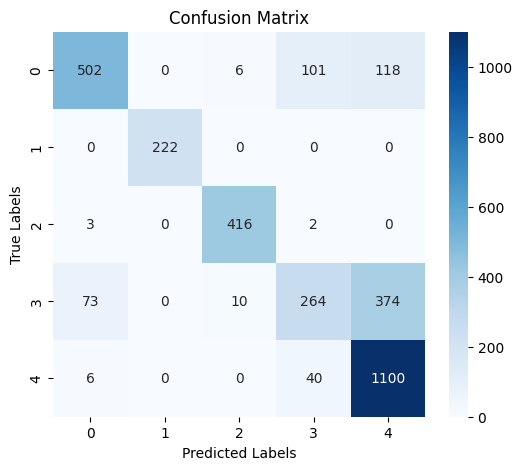

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot using seaborn
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Predict on validation set
y_val_pred = rf_model.predict(val_images_pre)  # Change model name if needed
plot_confusion_matrix(val_labels, y_val_pred, labels=range(len(set(val_labels))))


The Random Forest Model seems to be having a good accuracy score. 

In [44]:
cd CubeSat_ImageClassify  

/home/dsrh71/CubeSat_ImageClassify


/shared/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [45]:
from source.evaluate import evaluate_pipeline # A built-in function to evaluate a given ML pipeline by preprocessing, predicting, and calculating performance metrics.


### Evaluation Metrics ###

Evaluation Time:       47.11 seconds (The time it took for the pipeline to preprocess data and make predictions.)
Peak Memory Usage:     28899.88 MB (The maximum memory used during evaluation.)
Average CPU Usage:     99.64 % (The % shows how much of one CPU core was used during the evaluation.)
Algorithm code size:         18.46 MB (The size of the trained model and preprocessing function.)
Accuracy:              0.772 (The percentage of correctly classified samples.)
F1 Score:              0.754 (A balance of precision and recall, useful for imbalanced datasets.)

### Confusion Matrix ###



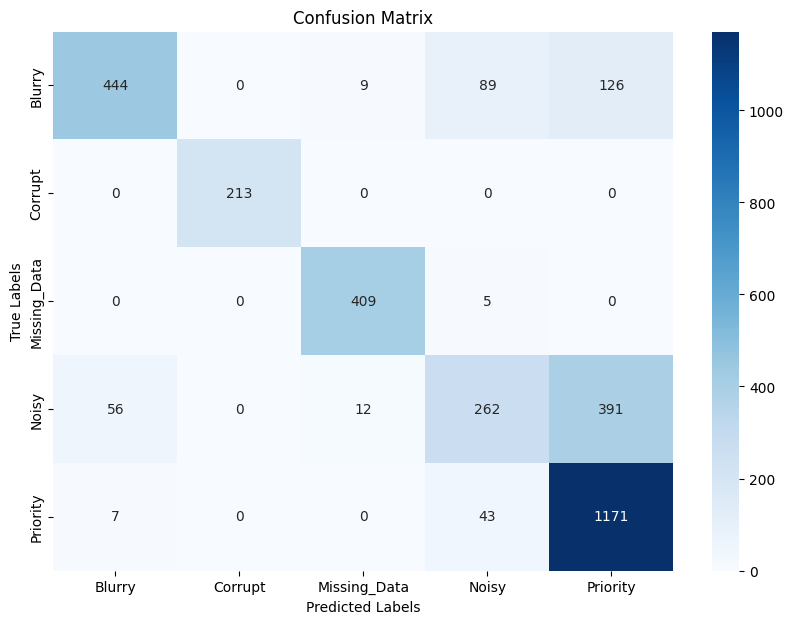

In [46]:
# Evaluate the pipeline
metrics = evaluate_pipeline(rf_model, test_images, test_labels, preprocessing_fn_ML)

## Evaluation Metrics Explanation

- **Evaluation Time** (`47.11s`): This is the total time taken to preprocess the data and make predictions. A higher time may indicate a complex model or inefficient preprocessing.

- **Peak Memory Usage** (`28899.88 MB`): Represents the maximum memory consumed during evaluation. High memory usage suggests the model requires significant resources, which could impact deployment.

- **Average CPU Usage** (`99.64%`): Shows how much of a single CPU core was used. Near 100% usage suggests the evaluation process is computationally intensive.

- **Algorithm Code Size** (`18.46 MB`): The size of the trained model and preprocessing function. A smaller model is preferable for deployment, but it should not compromise accuracy.

- **Accuracy** (`0.772`): The proportion of correctly classified samples. While a good indicator, it may not fully reflect performance if the dataset is imbalanced.

- **F1 Score** (`0.754`): The harmonic mean of precision and recall, making it useful for imbalanced datasets where accuracy alone can be misleading.

These metrics help assess the model's performance, efficiency, and resource usage.


## Evaluation Metrics Comparison

| **Metric**              | **Rf_Model**             | **SGD_Model**             | **Better Model**          |
|-------------------------|-------------------------|-------------------------|---------------------------|
| **Evaluation Time**      | 47.11s                  | 35.55s                  | SGD_Model                   |
| **Peak Memory Usage**   | 28899.88 MB             | 18535.05 MB             | SGD_Model|
| **Average CPU Usage**   | 99.64%                  | 94.19%                  | Rf_Model|
| **Algorithm Code Size** | 18.46 MB                | 0.08 MB                 | SGD_Model                   |
| **Accuracy**            | 0.772                   | 0.452                   | Rf_Model                  |
| **F1 Score**            | 0.754                   | 0.387                   | Rf_Model                   |

### Conclusion:
- **RF_Model** has better performance in terms of **accuracy** and **F1 score**, indicating stronger predictive capabilities.
- **SGD_Model** is more efficient with **evaluation time**, **memory usage**, **CPU usage**, and **model size**. However, it sacrifices accuracy and F1 score, making it less effective in classification tasks.